In [1]:
# change into root directory to the project
import os
os.chdir('..')

In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

%load_ext autoreload
%autoreload 2

In [9]:
import pypet
import numpy as np
import collections
import deap
from deap import base
from deap import creator
from deap import tools

import matplotlib.pyplot as plt

from neurolib.models.aln import ALNModel

from neurolib.optimize.evolution import Evolution

#import neurolib. as du

# sett dpi for notebooks on server
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['image.cmap'] = 'plasma'

In [10]:
alnModel = ALNModel(simulateBOLD=True)
alnModel.run()

INFO:root:Model aln created


In [11]:
alnModel.outputs

{'rates': {'t': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.9998e+03, 1.9999e+03,
         2.0000e+03]),
  'rates_exc': array([[8.33146236e+01, 7.23844726e+01, 6.57587880e+01, ...,
          2.21892867e-02, 2.27298728e-02, 2.32727878e-02]]),
  'rates_inh': array([[73.09666604, 67.38598775, 63.30308389, ...,  0.17675581,
           0.17761642,  0.17849476]])},
 'BOLD': {'t': array([0.1]), 'BOLD': array([[1.38468509e-10]])}}

In [12]:
def unpackOutputsAndStore(outputs, save_string):
    for key, value in outputs.items():
        new_save_string = save_string
        if isinstance(value, dict):
            new_save_string = save_string + "." + key
            print(save_string)
            unpackOutputsAndStore(value, new_save_string)
        else:
            print("-----------------------")
            print("save_string", new_save_string)
            #print("Adding", key, value)
            print('{}.{}'.format(new_save_string, key), value)
unpackOutputsAndStore(alnModel.outputs, save_string = '{}.ind_{:06d}'.format("outputs", 123))

outputs.ind_000123
-----------------------
save_string outputs.ind_000123.rates
outputs.ind_000123.rates.t [0.0000e+00 1.0000e-01 2.0000e-01 ... 1.9998e+03 1.9999e+03 2.0000e+03]
-----------------------
save_string outputs.ind_000123.rates
outputs.ind_000123.rates.rates_exc [[8.33146236e+01 7.23844726e+01 6.57587880e+01 ... 2.21892867e-02
  2.27298728e-02 2.32727878e-02]]
-----------------------
save_string outputs.ind_000123.rates
outputs.ind_000123.rates.rates_inh [[73.09666604 67.38598775 63.30308389 ...  0.17675581  0.17761642
   0.17849476]]
outputs.ind_000123
-----------------------
save_string outputs.ind_000123.BOLD
outputs.ind_000123.BOLD.t [0.1]
-----------------------
save_string outputs.ind_000123.BOLD
outputs.ind_000123.BOLD.BOLD [[1.38468509e-10]]


In [49]:
# This should be done in order to save the objectives for later reconstruction!!! it's not necessary during the simulation since we can always load the dataset
# in the notebook with ds = Dataset() and use it in the evaluation function. 

# save fitting data into trajectory for fitness evaluation later
def init_trajectory(traj):
    traj.f_add_parameter_group("fitness_objectives")
    traj.f_add_parameter_group("fitness_objectives.FC")
    traj.f_add_parameter('fitness_objectives.n_FC', NSUBJECTS, comment='Number of FC matrices')
    for i in range(NSUBJECTS):
        traj.f_add_parameter('fitness_objectives.FC.FC_{}'.format(i), FCs[i], comment='FC matrix of Subject {}'.format(i))
    #traj.f_store()    
init_trajectory(traj)

7.184749007504989

In [75]:
def evaluateSimulation(traj):
    rid = traj.id
    logging.info("Running run id {}".format(rid))

    model = evolution.loadIndividual(traj)
    
    model.params['dt'] = 0.1
    model.params['duration'] = 10*1000.
    model.run()
    
    # fitness evaluation here
    fitness = 1000 - np.max(model.rates_exc[:, -10000:])
    
    fitness_tuple = ()
    fitness_tuple += (fitness,)
    print("------------0-----------")
    print(fitness_tuple)
    return fitness_tuple, model.outputs

In [76]:
evolution = Evolution(alnModel, evaluateSimulation, weightList = [1.0], POP_INIT_SIZE=10)

MainProcess root INFO     Storing data to: ./data/hdf/evolution.hdf
MainProcess root INFO     Trajectory Name: results-2020-01-29-17H-28M-47S
MainProcess root INFO     Number of cores: 8
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
/Users/caglar/anaconda/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/caglar/anaconda/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [77]:
evolution.best_ind.fitness.wvalues

AttributeError: 'Evolution' object has no attribute 'best_ind'

In [78]:
evolution.runInitial()

MainProcess pypet.trajectory.Trajectory INFO     Your trajectory has not been explored, yet. I will call `f_explore` instead.
MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
STARTING runs of trajectory
`results-2020-01-29-17H-28M-47S`.
************************************************************

MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-202

Evaluating initial population of size 10 ...


MainProcess pypet.environment.MultiprocContext INFO     Starting the Storage Queue!
MainProcess pypet.environment.Environment INFO     Starting multiprocessing with at most 8 processes running at the same time.
MainProcess pypet INFO     PROGRESS: Finished  0/10 runs [                    ]  0.0%


------------0-----------
------------0-----------
------------0-----------
(942.4719544098695,)
(922.0773044012194,)
(999.9999999999995,)
------------0-----------
------------0-----------
(958.6331149373867,)
------------0-----------
------------0-----------
(886.3669819723873,)
(887.0650934891825,)
------------0-----------


MainProcess pypet INFO     PROGRESS: Finished  1/10 runs [==                  ] 10.0%, remaining: 0:00:02


(999.9999999999073,)
(888.2418028962948,)


MainProcess pypet INFO     PROGRESS: Finished  2/10 runs [====                ] 20.0%, remaining: 0:00:01
MainProcess pypet INFO     PROGRESS: Finished  3/10 runs [======              ] 30.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished  4/10 runs [========            ] 40.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished  5/10 runs [==========          ] 50.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished  6/10 runs [============        ] 60.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished  7/10 runs [==============      ] 70.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished  8/10 runs [================    ] 80.0%, remaining: 0:00:00


------------0-----------
------------0-----------
(923.9006910832302,)
(967.794777346198,)


MainProcess pypet INFO     PROGRESS: Finished  9/10 runs [==================  ] 90.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 10/10 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-29-17H-28M-47S`.
*************************************************

Parameters dictribution:
mue_ext_mean: 	 mean: 2.283,	 std: 1.091
mui_ext_mean: 	 mean: 1.77,	 std: 1.025
sigma_ou: 	 mean: 0.1538,	 std: 0.06644


/Users/caglar/anaconda/lib/python3.7/site-packages/pypet/storageservice.py:4597: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if (np.issubdtype(val.dtype, str) or
/Users/caglar/anaconda/lib/python3.7/site-packages/pypet/storageservice.py:4598: FutureWarning: Conversion of the second argument of issubdtype from `bytes` to `bytes` is deprecated. In future, it will be treated as `np.bytes_ == np.dtype(bytes).type`.
  np.issubdtype(val.dtype, bytes)):
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.
/Users/caglar/anaconda/lib/python3.7/site-packages/pypet/storageservice.py:3110: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  np.

MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
STARTING runs of trajectory
`results-2020-01-29-17H-28M-47S`.
************************************************************

MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `resu

Start of evolution
Replacing 0 invalid individuals.
----------- Generation 1 -----------


MainProcess pypet.environment.MultiprocContext INFO     Starting the Storage Queue!
MainProcess pypet.environment.Environment INFO     Starting multiprocessing with at most 8 processes running at the same time.
MainProcess pypet INFO     PROGRESS: Finished 10/30 runs [======              ] 33.3%


------------0-----------
------------0-----------
(904.3740080567638,)
(999.9999999999995,)
------------0-----------
------------0-----------
------------0-----------
(999.9999999999507,)
(999.9998457307688,)
------------0-----------
(922.8055063784768,)


MainProcess pypet INFO     PROGRESS: Finished 11/30 runs [=======             ] 36.7%, remaining: 0:00:04


------------0-----------
(999.9999999999815,)
(999.9999999999917,)


MainProcess pypet INFO     PROGRESS: Finished 12/30 runs [========            ] 40.0%, remaining: 0:00:02
MainProcess pypet INFO     PROGRESS: Finished 14/30 runs [=========           ] 46.7%, remaining: 0:00:01
MainProcess pypet INFO     PROGRESS: Finished 15/30 runs [==========          ] 50.0%, remaining: 0:00:00


------------0-----------
(999.9999947574418,)


MainProcess pypet INFO     PROGRESS: Finished 17/30 runs [===========         ] 56.7%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 18/30 runs [============        ] 60.0%, remaining: 0:00:00


------------0-----------
------------0-----------
------------0-----------
------------0-----------
------------0-----------
------------0-----------
(912.4550264328143,)
(872.8256040874587,)
(999.9999999999987,)
(999.9999999999977,)
(999.999999998204,)
(948.1809355881568,)
------------0-----------
------------0-----------
(870.9751999180628,)
(999.9999999999995,)


MainProcess pypet INFO     PROGRESS: Finished 20/30 runs [=============       ] 66.7%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 21/30 runs [==============      ] 70.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 23/30 runs [===============     ] 76.7%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 24/30 runs [================    ] 80.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 26/30 runs [=================   ] 86.7%, remaining: 0:00:00


------------0-----------
------------0-----------
(906.5598207014277,)
(999.9999999979406,)
------------0-----------
(998.8077502067405,)
------------0-----------
(999.9999999999781,)


MainProcess pypet INFO     PROGRESS: Finished 27/30 runs [==================  ] 90.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 29/30 runs [=================== ] 96.7%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 30/30 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED 

Best individual is [1.4386144821662263, 3.8576762863898977, 0.15446820347481835, 1.3333333333333333, 1.3333333333333333, 0.09666666666666666]
Score: 999.9999999999995
Fitness: (999.9999999999995,)
--- Population statistics ---
Parameters dictribution:
mue_ext_mean: 	 mean: 1.11,	 std: 0.7126
mui_ext_mean: 	 mean: 2.307,	 std: 0.8044
sigma_ou: 	 mean: 0.1531,	 std: 0.06722
There are 20 valid individuals
Mean score across population: 9.9e+02


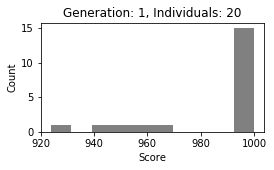

<Figure size 432x288 with 0 Axes>

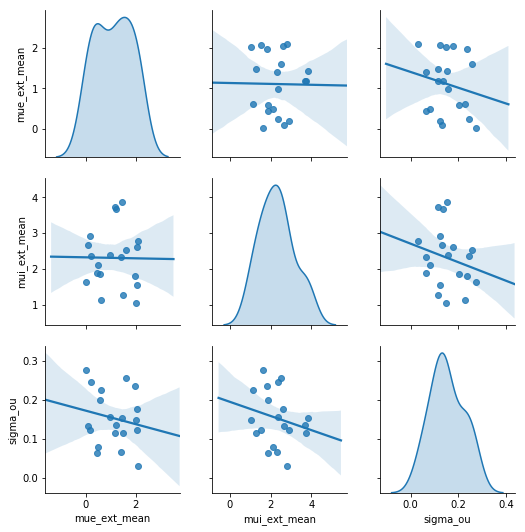

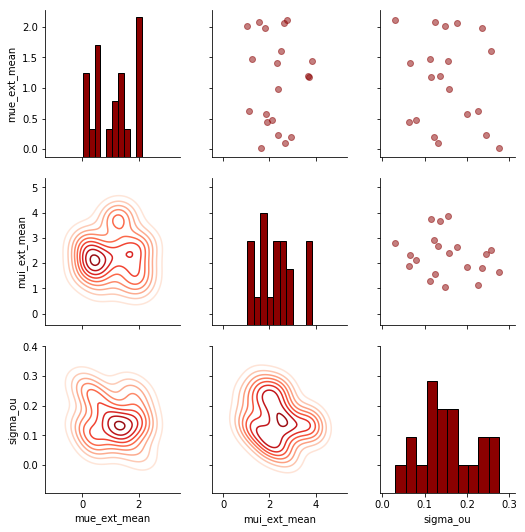

MainProcess pypet.storageservice.HDF5StorageService INFO     Start storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `config`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `derived_parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.stor

Replacing 0 invalid individuals.
----------- Generation 2 -----------


MainProcess pypet.environment.MultiprocContext INFO     Starting the Storage Queue!
MainProcess pypet.environment.Environment INFO     Starting multiprocessing with at most 8 processes running at the same time.
MainProcess pypet INFO     PROGRESS: Finished 30/50 runs [============        ] 60.0%


------------0-----------
(927.7755333117188,)
------------0-----------
(927.9687024388733,)
------------0-----------
------------0-----------
(999.9999999999972,)
------------0-----------
------------0-----------
(999.9999999999983,)
(879.8207499785418,)
(913.0558527467128,)


MainProcess pypet INFO     PROGRESS: Finished 33/50 runs [=============       ] 66.0%, remaining: 0:00:01


------------0-----------
(962.9898539141952,)
------------0-----------


MainProcess pypet INFO     PROGRESS: Finished 35/50 runs [==============      ] 70.0%, remaining: 0:00:00


(938.0734118628498,)


MainProcess pypet INFO     PROGRESS: Finished 38/50 runs [===============     ] 76.0%, remaining: 0:00:00


------------0-----------
------------0-----------
------------0-----------
------------0-----------
------------0-----------
------------0-----------
(999.9999999317309,)
(999.9999999999989,)
(915.3520242832299,)
(999.9999999999995,)
------------0-----------
(999.9999999999995,)
(944.51460343395,)
(999.9999999999992,)


MainProcess pypet INFO     PROGRESS: Finished 40/50 runs [================    ] 80.0%, remaining: 0:00:00


------------0-----------
(931.5691076487644,)


MainProcess pypet INFO     PROGRESS: Finished 43/50 runs [=================   ] 86.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 45/50 runs [==================  ] 90.0%, remaining: 0:00:00


------------0-----------
------------0-----------
(999.7908262441069,)
(940.2989083305401,)
------------0-----------
(999.6598691760861,)
------------0-----------
(999.9999999999997,)


MainProcess pypet INFO     PROGRESS: Finished 48/50 runs [=================== ] 96.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 50/50 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-29-17H-28M-47S`.
*************************************************

Best individual is [1.724501184444369, 3.8856032465861583, 0.07556200306185701, 0.326692376609601, 0.9889691185068311, 0.05804124602747399]
Score: 999.9999999999997
Fitness: (999.9999999999997,)
--- Population statistics ---
Parameters dictribution:
mue_ext_mean: 	 mean: 0.8824,	 std: 0.6115
mui_ext_mean: 	 mean: 2.891,	 std: 0.7207
sigma_ou: 	 mean: 0.1426,	 std: 0.06058
There are 20 valid individuals
Mean score across population: 1e+03


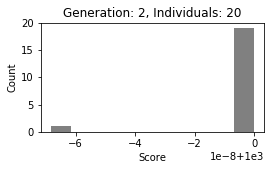

<Figure size 432x288 with 0 Axes>

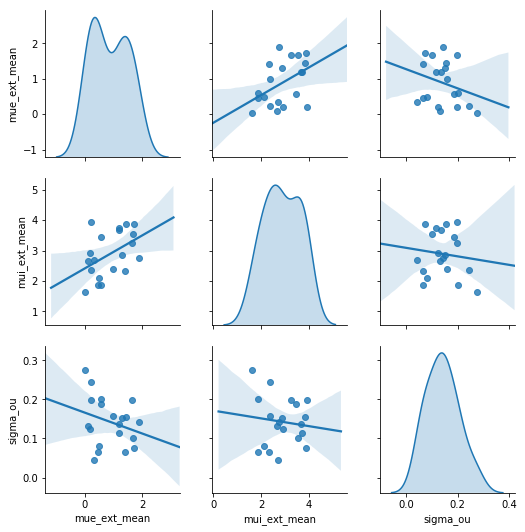

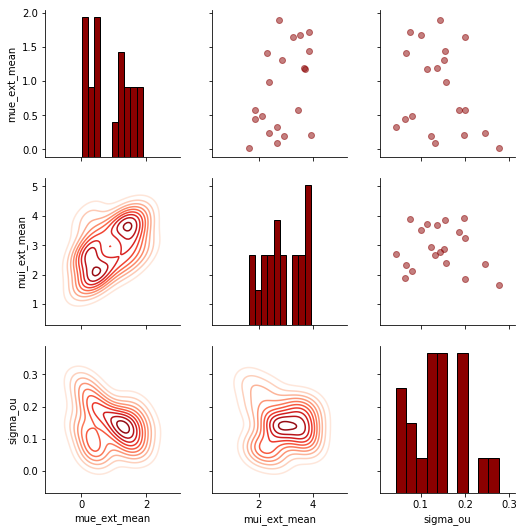

MainProcess pypet.storageservice.HDF5StorageService INFO     Start storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `config`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `derived_parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.stor

Replacing 0 invalid individuals.
----------- Generation 3 -----------


MainProcess pypet.environment.MultiprocContext INFO     Starting the Storage Queue!
MainProcess pypet.environment.Environment INFO     Starting multiprocessing with at most 8 processes running at the same time.
MainProcess pypet INFO     PROGRESS: Finished 50/70 runs [==============      ] 71.4%


------------0-----------
------------0-----------
------------0-----------
(999.9999999999965,)
(999.9999999999865,)
------------0-----------
------------0-----------
------------0-----------
(999.9999998406877,)
(999.9999999999994,)
(999.9999999999995,)
------------0-----------
(999.9999999999995,)
(999.9999999999994,)


MainProcess pypet INFO     PROGRESS: Finished 53/70 runs [===============     ] 75.7%, remaining: 0:00:01
MainProcess pypet INFO     PROGRESS: Finished 56/70 runs [================    ] 80.0%, remaining: 0:00:00


------------0-----------
(929.4268052657637,)
------------0-----------
(923.349735868199,)
------------0-----------
(999.9999998116783,)
------------0-----------
------------0-----------
------------0-----------
(933.942526165961,)
(999.9982133217298,)
------------0-----------
(999.9999999999991,)
(957.5819493815933,)


MainProcess pypet INFO     PROGRESS: Finished 60/70 runs [=================   ] 85.7%, remaining: 0:00:00


------------0-----------
(928.7509680945054,)
------------0-----------
(999.999999999987,)


MainProcess pypet INFO     PROGRESS: Finished 63/70 runs [==================  ] 90.0%, remaining: 0:00:00


------------0-----------
(933.6511862488803,)
------------0-----------
(922.078873344594,)
------------0-----------
(903.209082947105,)
------------0-----------
(999.9999999999972,)


MainProcess pypet INFO     PROGRESS: Finished 67/70 runs [=================== ] 95.7%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 70/70 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-29-17H-28M-47S`.
*************************************************

Best individual is [1.724501184444369, 3.8856032465861583, 0.07556200306185701, 0.326692376609601, 0.9889691185068311, 0.05804124602747399]
Score: 999.9999999999997
Fitness: (999.9999999999997,)
--- Population statistics ---
Parameters dictribution:
mue_ext_mean: 	 mean: 0.9065,	 std: 0.6048
mui_ext_mean: 	 mean: 3.233,	 std: 0.4912
sigma_ou: 	 mean: 0.117,	 std: 0.04905
There are 20 valid individuals
Mean score across population: 1e+03


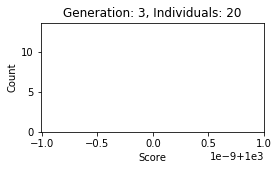

<Figure size 432x288 with 0 Axes>

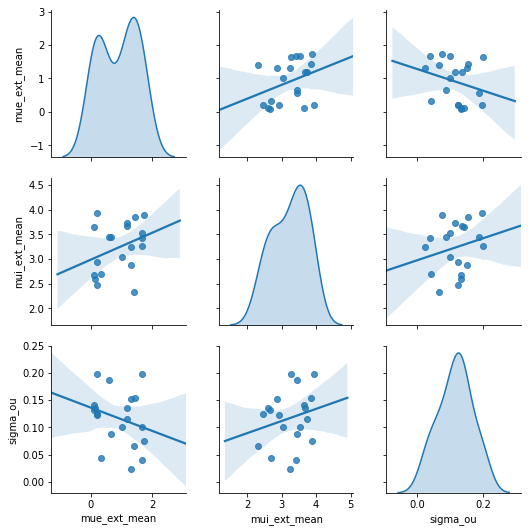

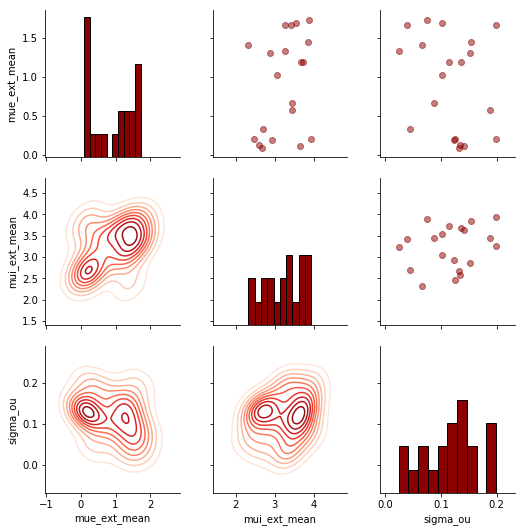

MainProcess pypet.storageservice.HDF5StorageService INFO     Start storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `config`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `derived_parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.stor

Replacing 0 invalid individuals.
----------- Generation 4 -----------


MainProcess pypet.environment.MultiprocContext INFO     Starting the Storage Queue!
MainProcess pypet.environment.Environment INFO     Starting multiprocessing with at most 8 processes running at the same time.
MainProcess pypet INFO     PROGRESS: Finished 70/90 runs [===============     ] 77.8%


------------0-----------
(999.9999999999987,)
------------0-----------
(999.9999999999968,)
------------0-----------
(999.9999999999995,)
------------0-----------
(999.9999999999997,)


MainProcess pypet INFO     PROGRESS: Finished 72/90 runs [================    ] 80.0%, remaining: 0:00:02


------------0-----------
------------0-----------
------------0-----------
(999.9999999999994,)
(999.9999999999982,)
(999.9999999999626,)
------------0-----------
(999.9999999999997,)


MainProcess pypet INFO     PROGRESS: Finished 77/90 runs [=================   ] 85.6%, remaining: 0:00:00


------------0-----------
------------0-----------
(999.9999999999994,)
(918.7680216532972,)
------------0-----------
(999.9999999999574,)
------------0-----------
(999.9999999999994,)


MainProcess pypet INFO     PROGRESS: Finished 81/90 runs [==================  ] 90.0%, remaining: 0:00:00


------------0-----------
------------0-----------
------------0-----------
------------0-----------
(999.999999999974,)
(948.2377094803123,)
(999.9999999999995,)
(999.9999999996435,)


MainProcess pypet INFO     PROGRESS: Finished 86/90 runs [=================== ] 95.6%, remaining: 0:00:00


------------0-----------
(999.9999999999997,)
------------0-----------
(999.9999999999992,)
------------0-----------
(999.9999999999992,)
------------0-----------
(999.9999999999995,)


MainProcess pypet INFO     PROGRESS: Finished 90/90 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-29-17H-28M-47S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-29

Best individual is [1.724501184444369, 3.8856032465861583, 0.07556200306185701, 0.326692376609601, 0.9889691185068311, 0.05804124602747399]
Score: 999.9999999999997
Fitness: (999.9999999999997,)
--- Population statistics ---
Parameters dictribution:
mue_ext_mean: 	 mean: 1.135,	 std: 0.5928
mui_ext_mean: 	 mean: 3.616,	 std: 0.2251
sigma_ou: 	 mean: 0.09694,	 std: 0.05306
There are 20 valid individuals
Mean score across population: 1e+03


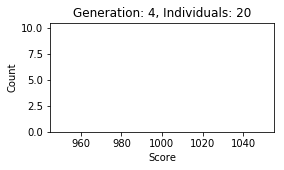

<Figure size 432x288 with 0 Axes>

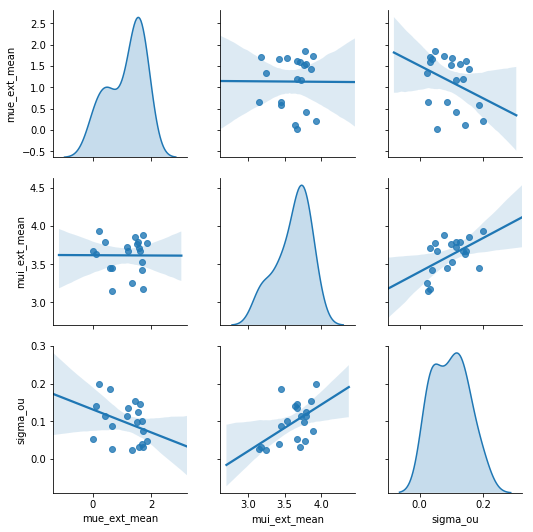

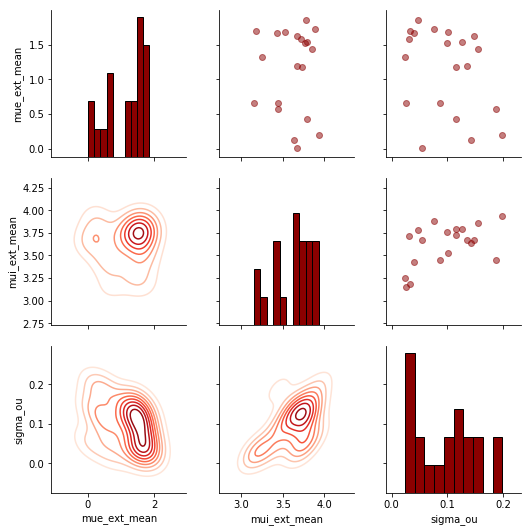

MainProcess pypet.storageservice.HDF5StorageService INFO     Start storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `config`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `derived_parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.stor

Replacing 0 invalid individuals.
----------- Generation 5 -----------


MainProcess pypet.environment.MultiprocContext INFO     Starting the Storage Queue!
MainProcess pypet.environment.Environment INFO     Starting multiprocessing with at most 8 processes running at the same time.
MainProcess pypet INFO     PROGRESS: Finished 90/110 runs [================    ] 81.8%


------------0-----------
------------0-----------
------------0-----------
(952.298153950499,)
(999.999999999998,)
------------0-----------
------------0-----------
------------0-----------
(999.9999999998589,)
(999.9999999999975,)
(999.9999999999994,)
(999.9999999999994,)
------------0-----------


MainProcess pypet INFO     PROGRESS: Finished 94/110 runs [=================   ] 85.5%, remaining: 0:00:01


------------0-----------
(999.9999999999997,)
(999.9999999999924,)
------------0-----------
------------0-----------
------------0-----------
------------0-----------
------------0-----------
(936.892532879352,)
(999.999999999999,)
------------0-----------
(999.9999999999995,)
------------0-----------
------------0-----------
(951.3784194200642,)
(999.9999999999993,)
(999.9999999999989,)
(950.6034605136067,)
(999.9999999999366,)


MainProcess pypet INFO     PROGRESS: Finished 99/110 runs [==================  ] 90.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 105/110 runs [=================== ] 95.5%, remaining: 0:00:00


------------0-----------
(999.9941748111311,)
------------0-----------
(999.9999999999994,)
------------0-----------
(999.9999999999992,)
------------0-----------
(999.9999999999994,)


MainProcess pypet INFO     PROGRESS: Finished 110/110 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-29-17H-28M-47S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Best individual is [1.724501184444369, 3.8856032465861583, 0.07556200306185701, 0.326692376609601, 0.9889691185068311, 0.05804124602747399]
Score: 999.9999999999997
Fitness: (999.9999999999997,)
--- Population statistics ---
Parameters dictribution:
mue_ext_mean: 	 mean: 1.154,	 std: 0.5711
mui_ext_mean: 	 mean: 3.659,	 std: 0.1988
sigma_ou: 	 mean: 0.09418,	 std: 0.04988
There are 20 valid individuals
Mean score across population: 1e+03


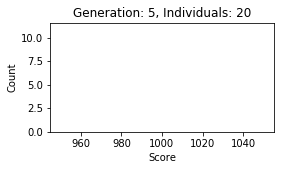

<Figure size 432x288 with 0 Axes>

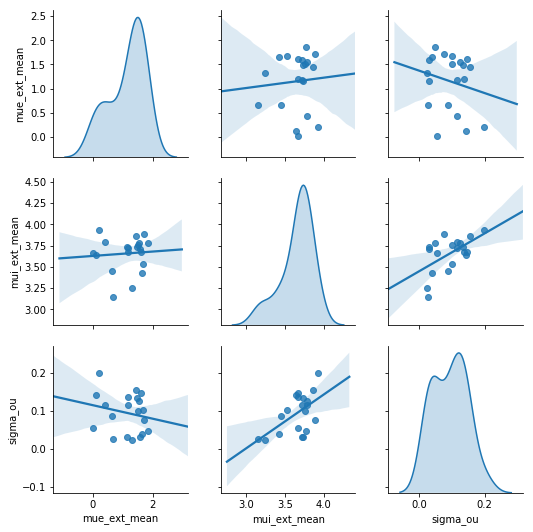

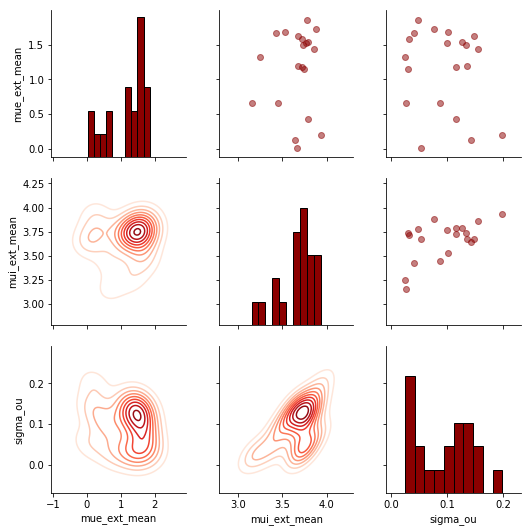

MainProcess pypet.storageservice.HDF5StorageService INFO     Start storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `config`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `derived_parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.stor

Replacing 0 invalid individuals.
----------- Generation 6 -----------


MainProcess pypet.environment.MultiprocContext INFO     Starting the Storage Queue!
MainProcess pypet.environment.Environment INFO     Starting multiprocessing with at most 8 processes running at the same time.
MainProcess pypet INFO     PROGRESS: Finished 110/130 runs [================    ] 84.6%


------------0-----------
------------0-----------
------------0-----------
------------0-----------
(999.9999999999976,)
(999.9999999999973,)
------------0-----------
------------0-----------
(999.9999999999994,)
(947.44555371104,)
(999.9999999999997,)


MainProcess pypet INFO     PROGRESS: Finished 111/130 runs [=================   ] 85.4%, remaining: 0:00:07


------------0-----------
(999.9999999999992,)
(932.6699260310364,)
------------0-----------
(999.9999999999994,)


MainProcess pypet INFO     PROGRESS: Finished 117/130 runs [==================  ] 90.0%, remaining: 0:00:00


------------0-----------
------------0-----------
------------0-----------
------------0-----------
------------0-----------
(999.9857607762827,)
(999.9999999999995,)
(928.0643389318293,)
(999.9999999999994,)
------------0-----------
(951.1343777887862,)
------------0-----------
(999.9999999999995,)
(999.9999999999989,)


MainProcess pypet INFO     PROGRESS: Finished 124/130 runs [=================== ] 95.4%, remaining: 0:00:00


------------0-----------
(999.9999999999983,)
------------0-----------
(999.999999999998,)
------------0-----------
(959.0110093970844,)
------------0-----------
(999.9999999999992,)
------------0-----------
(999.9999999999986,)


MainProcess pypet INFO     PROGRESS: Finished 130/130 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-29-17H-28M-47S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Best individual is [1.724501184444369, 3.8856032465861583, 0.07556200306185701, 0.326692376609601, 0.9889691185068311, 0.05804124602747399]
Score: 999.9999999999997
Fitness: (999.9999999999997,)
--- Population statistics ---
Parameters dictribution:
mue_ext_mean: 	 mean: 1.209,	 std: 0.5682
mui_ext_mean: 	 mean: 3.718,	 std: 0.1837
sigma_ou: 	 mean: 0.09784,	 std: 0.05051
There are 20 valid individuals
Mean score across population: 1e+03


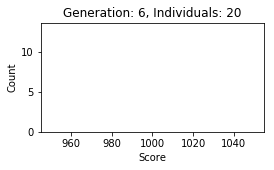

<Figure size 432x288 with 0 Axes>

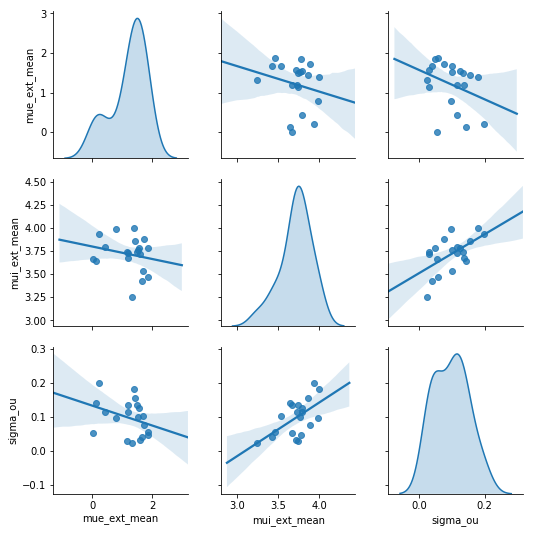

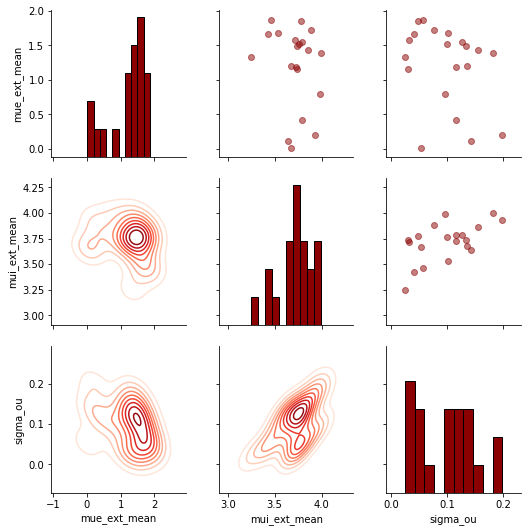

MainProcess pypet.storageservice.HDF5StorageService INFO     Start storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `config`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `derived_parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.stor

Replacing 0 invalid individuals.
----------- Generation 7 -----------


MainProcess pypet.environment.MultiprocContext INFO     Starting the Storage Queue!
MainProcess pypet.environment.Environment INFO     Starting multiprocessing with at most 8 processes running at the same time.
MainProcess pypet INFO     PROGRESS: Finished 130/150 runs [=================   ] 86.7%


------------0-----------
------------0-----------
------------0-----------
------------0-----------
------------0-----------
(999.9999990885017,)
------------0-----------
(999.9999999999993,)
(904.5363461502034,)
------------0-----------
(999.9999999999991,)
(999.9999999999965,)
(999.9999999999983,)
(999.9999999999995,)


MainProcess pypet INFO     PROGRESS: Finished 135/150 runs [==================  ] 90.0%, remaining: 0:00:01


------------0-----------
(999.9999999999995,)
------------0-----------
(999.9999999999901,)
------------0-----------
(999.9999999999993,)
------------0-----------
------------0-----------
(999.9999999999995,)
(999.9999999999995,)
------------0-----------
(999.9999999999995,)
------------0-----------
------------0-----------
------------0-----------
(999.6621158938991,)
(999.9999999999994,)
(999.9999999999986,)


MainProcess pypet INFO     PROGRESS: Finished 143/150 runs [=================== ] 95.3%, remaining: 0:00:00


------------0-----------
(999.9999999999994,)
------------0-----------
(999.9990433894011,)
------------0-----------
(949.1159824265337,)
------------0-----------
(999.9999999999995,)


MainProcess pypet INFO     PROGRESS: Finished 150/150 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-29-17H-28M-47S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Best individual is [1.724501184444369, 3.8856032465861583, 0.07556200306185701, 0.326692376609601, 0.9889691185068311, 0.05804124602747399]
Score: 999.9999999999997
Fitness: (999.9999999999997,)
--- Population statistics ---
Parameters dictribution:
mue_ext_mean: 	 mean: 1.231,	 std: 0.5333
mui_ext_mean: 	 mean: 3.73,	 std: 0.1862
sigma_ou: 	 mean: 0.09866,	 std: 0.05135
There are 20 valid individuals
Mean score across population: 1e+03


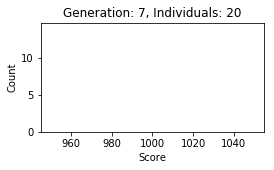

<Figure size 432x288 with 0 Axes>

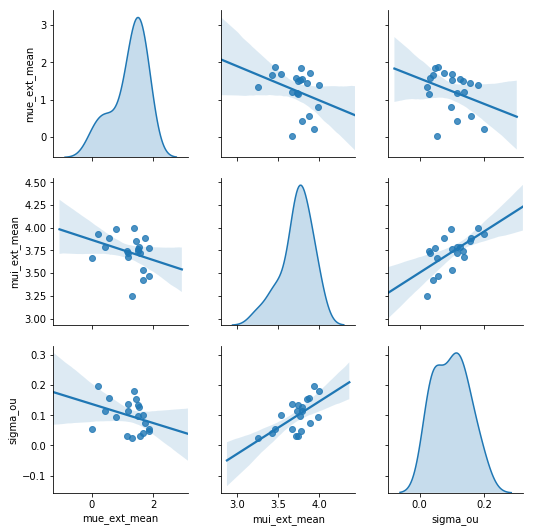

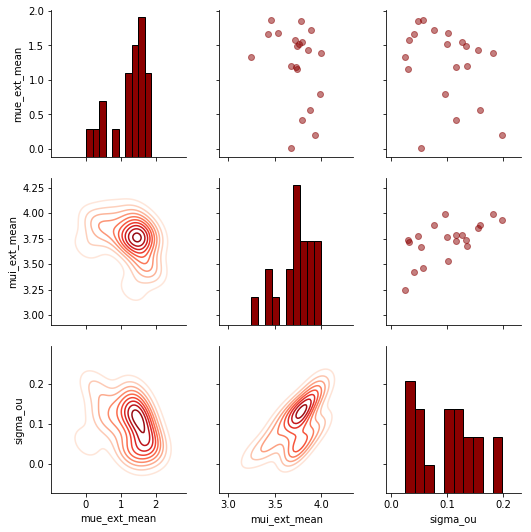

MainProcess pypet.storageservice.HDF5StorageService INFO     Start storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `config`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `derived_parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.stor

Replacing 0 invalid individuals.
----------- Generation 8 -----------


MainProcess pypet.environment.MultiprocContext INFO     Starting the Storage Queue!
MainProcess pypet.environment.Environment INFO     Starting multiprocessing with at most 8 processes running at the same time.
MainProcess pypet INFO     PROGRESS: Finished 150/170 runs [=================   ] 88.2%


------------0-----------
------------0-----------
(999.999999999999,)
------------0-----------
------------0-----------
------------0-----------
------------0-----------
(999.999999999993,)
(999.999956141533,)
(999.9999373673922,)
(999.031563415139,)
(999.9999999999976,)
------------0-----------
(999.999982968201,)


MainProcess pypet INFO     PROGRESS: Finished 153/170 runs [==================  ] 90.0%, remaining: 0:00:02


------------0-----------
(913.3125570064658,)
------------0-----------
(999.9999999999993,)
------------0-----------
(997.2086731635785,)
------------0-----------
(999.9999999999995,)
------------0-----------
(999.9999999999997,)


MainProcess pypet INFO     PROGRESS: Finished 162/170 runs [=================== ] 95.3%, remaining: 0:00:00


------------0-----------
(999.9999999999985,)
------------0-----------
(999.9999501172302,)
------------0-----------
(938.4584430006416,)
------------0-----------
(999.9999999999959,)
------------0-----------
------------0-----------
(999.9999999999995,)
(951.5475831305962,)
------------0-----------
------------0-----------
(999.9999999999992,)
(999.9999999999995,)


MainProcess pypet INFO     PROGRESS: Finished 170/170 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-29-17H-28M-47S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Best individual is [1.724501184444369, 3.8856032465861583, 0.07556200306185701, 0.326692376609601, 0.9889691185068311, 0.05804124602747399]
Score: 999.9999999999997
Fitness: (999.9999999999997,)
--- Population statistics ---
Parameters dictribution:
mue_ext_mean: 	 mean: 1.227,	 std: 0.5377
mui_ext_mean: 	 mean: 3.732,	 std: 0.1884
sigma_ou: 	 mean: 0.0945,	 std: 0.04969
There are 20 valid individuals
Mean score across population: 1e+03


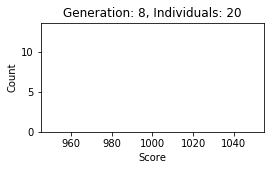

<Figure size 432x288 with 0 Axes>

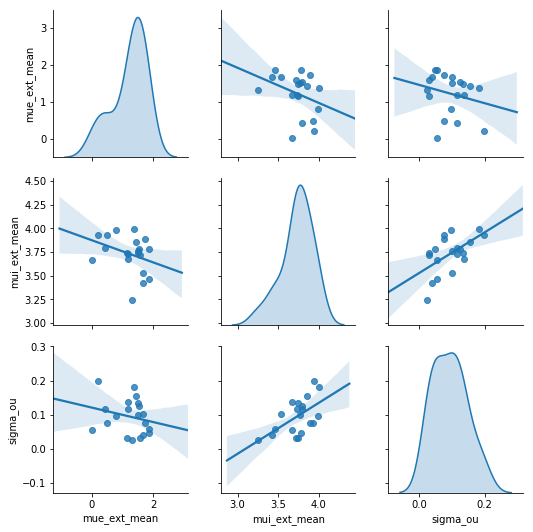

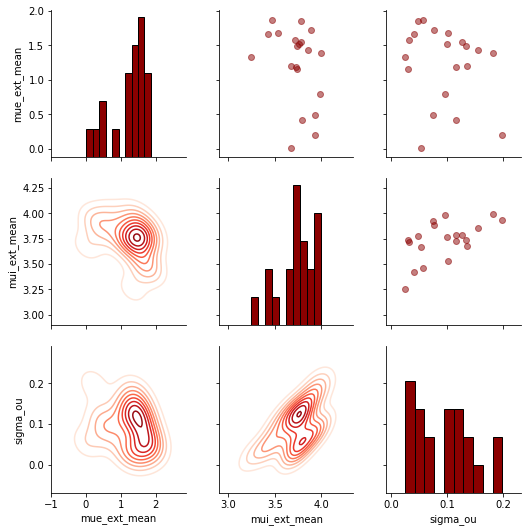

MainProcess pypet.storageservice.HDF5StorageService INFO     Start storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `config`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `derived_parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.stor

Replacing 0 invalid individuals.
----------- Generation 9 -----------


MainProcess pypet.environment.MultiprocContext INFO     Starting the Storage Queue!
MainProcess pypet.environment.Environment INFO     Starting multiprocessing with at most 8 processes running at the same time.
MainProcess pypet INFO     PROGRESS: Finished 170/190 runs [=================   ] 89.5%


------------0-----------
------------0-----------
------------0-----------
------------0-----------
------------0-----------
(896.5371461199634,)
(909.3463349446998,)
------------0-----------
------------0-----------
(999.9999999999995,)
(999.9999999977683,)


MainProcess pypet INFO     PROGRESS: Finished 171/190 runs [==================  ] 90.0%, remaining: 0:00:06


(999.9999999999994,)
(903.1266552155281,)
(913.7866431377266,)
------------0-----------
(999.9999999999994,)
------------0-----------
(973.1664612190009,)
------------0-----------
------------0-----------
(999.9999999999997,)
(999.9999999999995,)


MainProcess pypet INFO     PROGRESS: Finished 181/190 runs [=================== ] 95.3%, remaining: 0:00:00


------------0-----------
------------0-----------
(999.9999999999991,)
(999.999996907586,)
------------0-----------
(941.0377758604101,)
------------0-----------
(999.9999999999994,)
------------0-----------
(999.9999999999989,)
------------0-----------
------------0-----------
(999.9999999998838,)
------------0-----------
(915.1189990040687,)
(999.9999999999992,)
------------0-----------
(999.9999999999992,)


MainProcess pypet INFO     PROGRESS: Finished 190/190 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-29-17H-28M-47S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Best individual is [1.724501184444369, 3.8856032465861583, 0.07556200306185701, 0.326692376609601, 0.9889691185068311, 0.05804124602747399]
Score: 999.9999999999997
Fitness: (999.9999999999997,)
--- Population statistics ---
Parameters dictribution:
mue_ext_mean: 	 mean: 1.157,	 std: 0.5416
mui_ext_mean: 	 mean: 3.756,	 std: 0.1829
sigma_ou: 	 mean: 0.09776,	 std: 0.0492
There are 20 valid individuals
Mean score across population: 1e+03


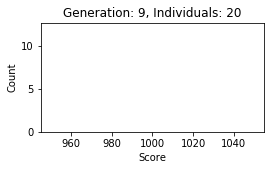

<Figure size 432x288 with 0 Axes>

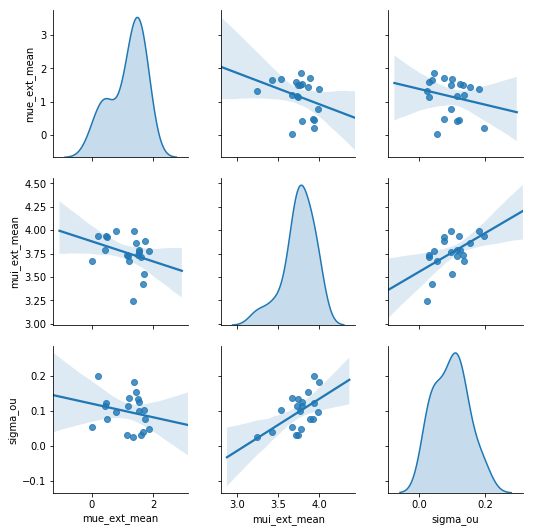

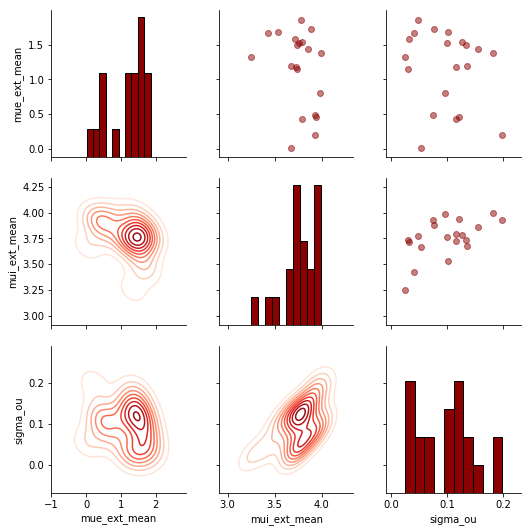

MainProcess pypet.storageservice.HDF5StorageService INFO     Start storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `config`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `derived_parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Start storing Trajectory `results-2020-01-29-17H-28M-47S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `config`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.


--- End of evolution ---
Best individual is [1.724501184444369, 3.8856032465861583, 0.07556200306185701, 0.326692376609601, 0.9889691185068311, 0.05804124602747399], (999.9999999999997,)
--- End of evolution ---


MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `derived_parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished storing Trajectory `results-2020-01-29-17H-28M-47S`.


In [79]:
evolution.runEvolution()

In [76]:
toolbox = deap.base.Toolbox()
# testing block for a single run
class Foo:
    def init():
        return
# dummy initialization of a trajectory
traj_test = Foo()
traj_test.id = -6969

traj_test.individual = evolution.toolbox.individual()
traj_test.individual.id = -6969


print('pars', paramInterval._fields)
print('pars', traj_test.individual)

# uncomment for single run
fitness_tuple, simulation_results = simulateIndividual(traj_test, traj_test.individual)

if 'fitness' in globals():
    print('FITNESS', fitness_tuple)
#del traj_test

pars ('mue_ext_mean', 'mui_ext_mean', 'sigma_ou')
pars [2.426116882101589, 0.3203068944163392, 0.04164779931884303, 1.3333333333333333, 1.3333333333333333, 0.09666666666666666]


In [55]:
evolution = Evolution(alnModel, evalFunction, weightList = [1.0])

MainProcess root INFO     Storing data to: ./data/hdf/evolution.hdf
MainProcess root INFO     Trajectory Name: results-2020-01-29-15H-37M-59S
MainProcess root INFO     Number of cores: 8
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
/Users/caglar/anaconda/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/caglar/anaconda/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [61]:
evolution.toolbox.individual()

[2.2841342671841405,
 1.881658432891666,
 0.2219763831739735,
 1.3333333333333333,
 1.3333333333333333,
 0.09666666666666666]

In [ ]:
def simulate_individual(traj):
    # either pass an individual or a pypet trajectory with the attribute individual
    if type(traj).__name__ == 'Individual':
        individual = traj
    else:
        individual = traj.individual
    
    rid = traj.id
    print("Running ID {}".format(rid))
    
    result_dict = {"t_BOLD" : None, "BOLD" : None, "t_rates" : None, "rates_exc" : None}
    invalid_result = result_dict.copy()
    
    # Check if the params are valid
    if not du.check_param_validity(individual, paramInterval):
        if (debug_output):
            print('WARN: invalid paramteres')
        # abort run
        return invalid_result    
        
    # Return fast dummy output for testing purposes
    if dummy_output:
        if random.random() < 0.1:
            return invalid_result
        else:
            t_rates = np.array(range(200))
            rates_exc = np.random.random((80, 200))
            t_BOLD = np.array(range(20))
            BOLD = np.random.random((80, 20))
            result_dict = {"t_BOLD" : t_BOLD, "BOLD" : BOLD, "t_rates" : t_rates, "rates_exc" : rates_exc}
            return result_dict
    
    # Load this individual's parameters
    params = copy.deepcopy(defaultParams) # copy default parameters 
    indiv_dict = du.indivAsDict_adapt(individual, ParametersInterval, paramInterval)
    params.update(indiv_dict) # and then update this individual's specific parameters

    # STAGE 1
    # -------------------------
    # First run the network, to ensure there is some activity
    params['dt'] = 0.1
    params['duration'] = 10*1000.
    
    retVals = ti.timeIntegration(params)
    rates_exc, rates_inh, t, mufe, mufi, IA, seem, seim, siem, siim, \
                seev, seiv, siev, siiv, r_ext_chunk, mue_ext_chunk = retVals

    #print 'pars:', 'Ke_gl', params['Ke_gl'], 'mue_ext_mean', params['mue_ext_mean'], 'sigmaou', params['sigma_ou']        
    if np.max(rates_exc[:,5000:]) > 0.3 or np.max(rates_exc[:,5000:]) < 0.01:
        if (debug_output):
            pass
            #print(rid, 'rate stuck: np.max(rates_exc[:,5000:]) = {}'.format(np.max(rates_exc[:,5000:])))
            #plt.plot(rates_exc.T)
            #plt.show()
        return invalid_result
    
    # STAGE 2
    # -------------------------    
    # BOLD for 20 seconds to see if it overflows
    params['dt'] = 0.2
    params['duration'] = 20*1000.
    t_BOLD, BOLD, return_tuple = cw.chunkwiseTimeIntAndBOLD(params)
    rates_exc, rates_inh, \
                            mufe, mufi, IA, seem, seim, siem, siim, \
                            seev, seiv, siev, siiv, integrated_chunk, rhs_chunk = return_tuple
    if np.std(BOLD[:, 5:7]) < 0.001:
        if (debug_output):
            pass
            #print(rid, 'BOLD stuck: np.std(BOLD[:, 5:7]) = {}'.format(np.std(BOLD[:, 5:7])))
            #plt.plot(BOLD.T)
            #plt.show()
        return invalid_result    
    if (debug_output):
        pass
        #print(rid, 'continue simulation')
                  

    # STAGE 3
    # -------------------------    
    params['dt'] = 0.2
    params['duration'] = defaultParams['duration']

    
    t_BOLD, BOLD, return_tuple = cw.chunkwiseTimeIntAndBOLD(params, chunkSize=10000)
    rates_exc, rates_inh, \
                            mufe, mufi, IA, seem, seim, siem, siim, \
                            seev, seiv, siev, siiv, integrated_chunk, rhs_chunk = return_tuple
    
    t_rates = np.linspace(0, len(rates_exc[0])*params['dt'], len(rates_exc[0]))
    
    if np.max(rates_exc[:,5000:]) > 0.3 or np.max(rates_exc[:,5000:]) < 0.01:
        if (debug_output):
            print(rid, 'continued but rate overflow/stuck')
            #print(rid, '-------------------------')
            #print(rid, 'pars', ', '.join([ ' '.join([k, str(params[k])]) for k in paramInterval._fields]))
            #print(rid, 'np.max(rates_exc[:,5000:])', np.max(rates_exc[:,5000:]))
            #print(rid, 'np.std(BOLD[:, 5:7])', np.std(BOLD[:, 5:7]))
            #f, (ax2, ax3) = plt.subplots(2, 1)
            #ax2.set_title(rid)
            #ax2.plot(BOLD.T)
            #ax3.plot(rates_exc.T)
            #plt.show()
            #print('------------------------------'            )
        return invalid_result 
    if np.std(BOLD[:, 5:7]) < 0.004:
        if (debug_output):
            print(rid, 'continued but BOLD stuck')
        return invalid_result
    if len([i for i in range(N) if np.max(BOLD[i, 15:20]) > 0.001]) < N-2:
        if (debug_output):
            print(rid, 'continued but BOLD overflow ')
            #plt.plot(BOLD.T)
            #plt.title(rid)
            #plt.show()
        return invalid_result      
    
    # if all went ok...
    downsample_to = params['save_dt']
    if downsample_to != None:
        t = t[::int(downsample_to / params['dt'])]
        rates_exc = rates_exc[:, ::int(downsample_to / params['dt'])]
        rates_inh = rates_inh[:, ::int(downsample_to / params['dt'])]
        #stimulus = stimulus[:, ::int(downsample_to / params['dt'])] # does not work if stimulus is just a float!
        
    result_dict = {"t_BOLD" : t_BOLD, "BOLD" : BOLD, "t_rates" : t_rates, "rates_exc" : rates_exc}
    
    return result_dict    # DEAP wants a tuple here!

def evaluate_individual(traj):
    # either pass an individual or a pypet trajectory with the attribute individual
    if type(traj).__name__ == 'Individual':
        individual = traj
    else:
        individual = traj.individual
        
    simulation_results = simulate_individual(traj)
    #print(simulation_results)
    
    NSUBJECTS = traj.fitness_objectives.n_FC
    rid = traj.id
    
    fitness_tuple = ()
    
    BOLD = simulation_results['BOLD']
    t_BOLD = simulation_results['t_BOLD']
    rates_exc = simulation_results['rates_exc']
    
    if BOLD is not None:
        FC_OFFSET = 10 * 1000 # Offset in milliseconds in the simuated BOLD to compute the FC matrix
        FC_sim = func.fc(BOLD[:, t_BOLD > FC_OFFSET])           
        for i in range(NSUBJECTS):
            this_FC = traj.fitness_objectives.FC['FC_{}'.format(i)]
            fitness_tuple += (func.matrix_correlation(FC_sim, this_FC),)
        FCcorr = np.mean(fitness_tuple)
        if (debug_output):
            print(rid, '-------------------------')
            print(rid, 'pars', ', '.join([ ' '.join([k, str(params[k])]) for k in paramInterval._fields]))
            print(rid, 'FC', FCcorr)
            print(rid, 'fitness_tuple')
            print(fitness_tuple)
            print(rid, 'np.max(rates_exc[:,5000:])', np.max(rates_exc[:,100:]))
            print(rid, 'np.std(BOLD[:, 5:7])', np.std(BOLD[:, 5:7]))
            f, (ax1, ax2, ax3) = plt.subplots(3, 1)
            ax1.imshow(FC_sim)
            ax1.set_title(rid)
            ax2.imshow(scipy.stats.mstats.zscore(BOLD[:, t_BOLD > FC_OFFSET], axis=1))
            ax3.plot(rates_exc.T)
            plt.show()
            print('------------------------------')            
    else:
        fitness_tuple = (np.nan, )* NSUBJECTS
    return (fitness_tuple, simulation_results)